# Pycaret
---
## 데이터 불러오기

In [1]:
pip install pycaret

  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/d5/54/d575af389203fc27d6c6cf7d60c4e67fcabfda4bc8e84271c8a396bd4a03/pycaret-3.1.0-py3-none-any.whl.metadata
  Using cached pycaret-3.1.0-py3-none-any.whl.metadata (16 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached pyod-1.1.1-py3-none-any.whl
  Obtaining dependency information for imbalanced-learn>=0.8.1 from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
  Obtaining dependency information for category-encoders>=2.4.0 from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
  Using cached category_encoders-2.6.3-py2.py3-none-any.whl.metadata (8.0 kB)
  Obtaining dependency information

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbconvert 7.7.3 requires beautifulsoup4, which is not installed.
nbconvert 7.7.3 requires bleach!=5.0.0, which is not installed.
nbconvert 7.7.3 requires defusedxml, which is not installed.
nbconvert 7.7.3 requires jupyterlab-pygments, which is not installed.
nbconvert 7.7.3 requires nbclient>=0.5.0, which is not installed.
nbconvert 7.7.3 requires pandocfilters>=1.4.1, which is not installed.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update

In [3]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/11/6f/419545a6a344cfd1358a80c36a06431881d607830483ef63d7c38905cd22/xgboost-2.0.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.5/99.7 MB 9.6 MB/s eta 0:00:11
   ---------------------------------------- 1.0/99.7 MB 10.5 MB/s eta 0:00:10
    --------------------------------------- 1.6/99.7 MB 11.0 MB/s eta 0:00:09
    --------------------------------------- 2.1/99.7 MB 11.2 MB/s eta 0:00:09
   - -------------------------------------- 2.7/99.7 MB 11.3 MB/s eta 0:00:09
   - -------------------------------------- 3.2/99.7 MB 11.4 MB/s eta 0:00:09
   - -------------------------------------- 3.8/99.7 MB 11.4 MB/s eta 0:00:09
   - -------------------------------------- 4.2/99.7 MB 11.6 MB/s eta 0:00:09
   - -------------------------------------- 4.3/99.7 MB 10.1 MB/s eta 0:00:10
   - -------------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.model_selection import train_test_split
from pycaret.classification import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from pycaret.classification import *

### 팀 데이터

In [5]:
team = pd.read_csv("final_data.csv", encoding = 'cp949', index_col = 0)
team

,matchID,team,firstBaron,baron,firstDragon,dragon,firstInhibitor,inhibitor,firstRiftHerald,riftHerald,firstTower,tower,win,kills,deaths,totalDamageDealtToChampions,totalMinionsKilled
0,KR_6321310517,100,True,1,True,2,True,2,False,0,True,10,True,43,20,95441,578
1,KR_6321324394,100,False,0,False,0,False,0,True,1,False,1,False,5,31,38437,417
2,KR_6321333413,100,False,1,True,4,False,1,False,0,False,7,False,36,55,109322,594
3,KR_6321357609,100,True,1,False,4,True,2,False,0,True,10,True,50,22,133450,880
4,KR_6321393539,100,False,0,False,1,False,0,True,1,True,3,True,13,6,35515,403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230229,KR_6456194749,200,False,0,True,2,False,0,False,0,False,0,False,15,35,54920,608
230230,KR_6453104439,200,False,0,False,3,True,1,False,0,False,8,True,40,15,103596,610
230231,KR_6453084521,200,True,1,True,4,True,2,False,1,True,9,True,35,31,126382,722
230232,KR_6453072254,200,False,0,False,0,False,0,True,1,False,0,False,11,18,35449,388


In [6]:
team.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230234 entries, 0 to 230233
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   matchID                      230234 non-null  object
 1   team                         230234 non-null  int64 
 2   firstBaron                   230234 non-null  bool  
 3   baron                        230234 non-null  int64 
 4   firstDragon                  230234 non-null  bool  
 5   dragon                       230234 non-null  int64 
 6   firstInhibitor               230234 non-null  bool  
 7   inhibitor                    230234 non-null  int64 
 8   firstRiftHerald              230234 non-null  bool  
 9   riftHerald                   230234 non-null  int64 
 10  firstTower                   230234 non-null  bool  
 11  tower                        230234 non-null  int64 
 12  win                          230234 non-null  bool  
 13  kills         

In [7]:
team.team = team.team.astype('category')
team = pd.get_dummies(team, columns = ['team'])

### 개인 데이터

In [2]:
data = pd.read_csv("final.csv", encoding = 'cp949', index_col = 0)
data

,tier,matchID,duration,playerNum,teamId,assists,deaths,firstBloodAssist,firstBloodKill,firstTowerAssist,...,kills,longestTimeSpentLiving,totalDamageDealtToChampions,totalDamageTaken,totalHeal,totalMinionsKilled,totalTimeSpentDead,visionScore,win_team,win
0,IRON,KR_6321310517,1730,0,100,2,6,False,False,False,...,5,582,10443,26826,779,191,174,12,100,1
1,IRON,KR_6321324394,1354,0,100,2,8,False,False,False,...,1,347,10835,18228,1220,136,200,10,200,0
2,IRON,KR_6321333413,2181,0,100,4,12,False,False,False,...,2,364,8819,33508,4057,95,305,19,200,0
3,IRON,KR_6321357609,2228,0,100,13,7,False,False,False,...,15,712,53227,32657,8450,274,283,25,100,1
4,IRON,KR_6321393539,1216,0,100,1,1,False,False,False,...,2,416,8879,11318,5487,106,16,15,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114990,PLATINUM,KR_6456194749,1599,9,200,7,2,False,False,False,...,1,685,3686,10165,670,18,58,33,100,0
114991,PLATINUM,KR_6453104439,1718,9,200,24,4,False,False,False,...,0,392,3991,13921,1906,15,63,74,200,1
114992,PLATINUM,KR_6453084521,1800,9,200,16,7,False,False,False,...,6,531,36424,17777,1618,84,153,69,200,1
114993,PLATINUM,KR_6453072254,968,9,200,2,4,False,False,False,...,1,279,3746,7540,225,24,45,19,100,0


In [6]:
data.columns

Index(['tier', 'matchID', 'duration', 'playerNum', 'teamId', 'assists',
       'deaths', 'firstBloodAssist', 'firstBloodKill', 'firstTowerAssist',
       'firstTowerKill', 'individualPosition', 'item0', 'item1', 'item2',
       'item3', 'item4', 'item5', 'item6', 'kills', 'longestTimeSpentLiving',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'totalHeal',
       'totalMinionsKilled', 'totalTimeSpentDead', 'visionScore', 'win_team',
       'win'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149950 entries, 0 to 114994
Data columns (total 29 columns):
 #   Column                       Non-Null Count    Dtype 
---  ------                       --------------    ----- 
 0   tier                         1149950 non-null  object
 1   matchID                      1149950 non-null  object
 2   duration                     1149950 non-null  int64 
 3   playerNum                    1149950 non-null  int64 
 4   teamId                       1149950 non-null  int64 
 5   assists                      1149950 non-null  int64 
 6   deaths                       1149950 non-null  int64 
 7   firstBloodAssist             1149950 non-null  bool  
 8   firstBloodKill               1149950 non-null  bool  
 9   firstTowerAssist             1149950 non-null  bool  
 10  firstTowerKill               1149950 non-null  bool  
 11  individualPosition           1149950 non-null  object
 12  item0                        1149950 non-null  int64 
 13

In [3]:
data.individualPosition = data.individualPosition.astype('category')
data.tier = data.tier.astype('category')
data = pd.get_dummies(data, columns = ['individualPosition', 'tier'])

In [14]:
train_data

,matchID,team,firstBaron,baron,firstDragon,dragon,firstInhibitor,inhibitor,firstRiftHerald,riftHerald,firstTower,tower,kills,deaths,totalDamageDealtToChampions,totalMinionsKilled
71746,KR_6457358150,200,False,0,False,0,False,0,False,0,False,0,12,31,56449,494
179690,KR_6389239677,200,False,0,False,1,False,0,False,0,False,3,25,23,82812,653
94647,KR_6459613362,100,True,1,False,2,True,2,True,2,True,9,40,22,117566,566
95115,KR_6444322215,100,False,0,True,1,False,0,True,1,True,1,20,4,34724,308
81398,KR_6454364179,200,False,0,False,0,False,0,False,0,False,0,8,32,22439,269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,KR_6459513277,200,False,0,True,1,False,0,False,1,True,4,18,24,48363,400
103694,KR_6384661381,100,False,0,False,0,False,0,False,0,False,0,2,16,25949,296
131932,KR_6458399263,200,False,0,True,2,False,0,True,1,True,5,22,8,56015,441
146867,KR_6460564638,100,False,0,False,0,False,0,False,0,False,0,15,40,77455,517


In [4]:
X_data = data.drop(columns = ['duration','win', 'matchID', 'playerNum', 'win_team', 'item0', 'item1', 'item2', 'item3', 'item4','item5', 'item6'])

In [5]:
y_data = data.win

In [8]:
X_team = team.drop(columns = 'win')
y_team = team.win

In [9]:
X_team = X_team.drop(columns = 'matchID')

## 변수 중요도

In [39]:
col = X_team.columns
X_train, X_test, y_train, y_test = train_test_split(X_team, y_team, test_size = 0.2)

xgb = XGBClassifier(n_estiamtors = 500)
xgb.fit(X_train, y_train, early_stopping_rounds = 50, eval_set = [(X_test, y_test)], eval_metric = 'logloss')

importance = xgb.feature_importances_
feature = col
importances = pd.DataFrame()
importances['Feature'] = feature
importances['Importances'] = importance
importances.sort_values('Importances', ascending = False, inplace = True)
importances.reset_index(drop = True, inplace = True)
importances

[12:38:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estiamtors" } are not used.

[0]	validation_0-logloss:0.47720
[1]	validation_0-logloss:0.35724
[2]	validation_0-logloss:0.28177
[3]	validation_0-logloss:0.23124
[4]	validation_0-logloss:0.19649
[5]	validation_0-logloss:0.17181
[6]	validation_0-logloss:0.15404
[7]	validation_0-logloss:0.14111
[8]	validation_0-logloss:0.13168
[9]	validation_0-logloss:0.12447
[10]	validation_0-logloss:0.11881
[11]	validation_0-logloss:0.11500
[12]	validation_0-logloss:0.11177
[13]	validation_0-logloss:0.10931
[14]	validation_0-logloss:0.10705
[15]	validation_0-logloss:0.10570
[16]	validation_0-logloss:0.10435
[17]	validation_0-logloss:0.10330
[18]	validation_0-logloss:0.10248
[19]	validation_0-logloss:0.10174
[20]	validation_0-logloss:0.10145
[21]	validation_0-logloss:0.10097
[22]	validation_0-logloss:0.10046
[23]	validation_0-logloss:

,Feature,Importances
0,inhibitor,0.489234
1,tower,0.243459
2,deaths,0.140779
3,kills,0.043731
4,baron,0.015462
5,firstBaron,0.014860
6,firstTower,0.013314
7,dragon,0.010600
8,firstInhibitor,0.008797
9,totalMinionsKilled,0.005239


[12:38:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estiamtors" } are not used.

[0]	validation_0-logloss:0.47736
[1]	validation_0-logloss:0.35733
[2]	validation_0-logloss:0.28156
[3]	validation_0-logloss:0.23143
[4]	validation_0-logloss:0.19649
[5]	validation_0-logloss:0.17198
[6]	validation_0-logloss:0.15422
[7]	validation_0-logloss:0.14129
[8]	validation_0-logloss:0.13189
[9]	validation_0-logloss:0.12498
[10]	validation_0-logloss:0.11973
[11]	validation_0-logloss:0.11584
[12]	validation_0-logloss:0.11275
[13]	validation_0-logloss:0.11057
[14]	validation_0-logloss:0.10884
[15]	validation_0-logloss:0.10733
[16]	validation_0-logloss:0.10618
[17]	validation_0-logloss:0.10540
[18]	validation_0-logloss:0.10471
[19]	validation_0-logloss:0.10406
[20]	validation_0-logloss:0.10365
[21]	validation_0-logloss:0.10342
[22]	validation_0-logloss:0.10305
[23]	validation_0-logloss:

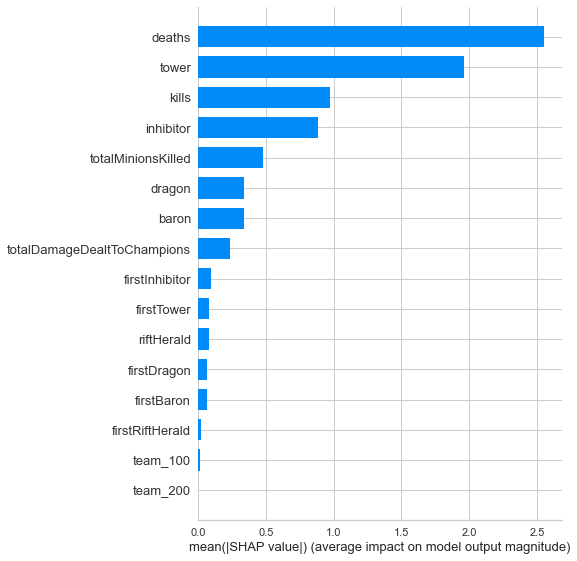

In [40]:
import shap
shap.initjs()
X_train, X_test, y_train, y_test = train_test_split(X_team, y_team, test_size = 0.2)

xgb = XGBClassifier(n_estiamtors = 500)
xgb.fit(X_train, y_train, early_stopping_rounds = 50, eval_set = [(X_test, y_test)], eval_metric = 'logloss')
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, col, plot_type = 'bar')

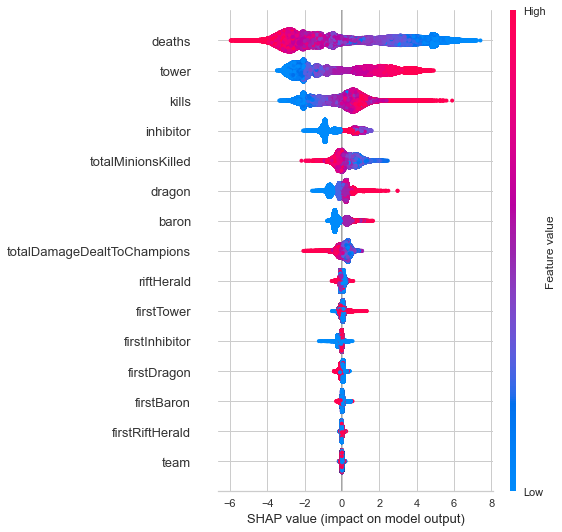

In [28]:
shap.summary_plot(shap_values, X_train)

In [29]:
col = X_data.columns
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2)

xgb = XGBClassifier(n_estiamtors = 500)
xgb.fit(X_train, y_train, early_stopping_rounds = 50, eval_set = [(X_test, y_test)], eval_metric = 'logloss')

importance = xgb.feature_importances_
feature = col
importances = pd.DataFrame()
importances['Feature'] = feature
importances['Importances'] = importance
importances.sort_values('Importances', ascending = False, inplace = True)
importances.reset_index(drop = True, inplace = True)
importances

[12:25:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estiamtors" } are not used.

[0]	validation_0-logloss:0.59694
[1]	validation_0-logloss:0.54183
[2]	validation_0-logloss:0.50749
[3]	validation_0-logloss:0.48520
[4]	validation_0-logloss:0.46968
[5]	validation_0-logloss:0.45823
[6]	validation_0-logloss:0.45008
[7]	validation_0-logloss:0.44371
[8]	validation_0-logloss:0.43916
[9]	validation_0-logloss:0.43517
[10]	validation_0-logloss:0.43167
[11]	validation_0-logloss:0.42886
[12]	validation_0-logloss:0.42582
[13]	validation_0-logloss:0.42372
[14]	validation_0-logloss:0.42179
[15]	validation_0-logloss:0.41960
[16]	validation_0-logloss:0.41787
[17]	validation_0-logloss:0.41589
[18]	validation_0-logloss:0.41446
[19]	validation_0-logloss:0.41302
[20]	validation_0-logloss:0.41144
[21]	validation_0-logloss:0.41027
[22]	validation_0-logloss:0.40915
[23]	validation_0-logloss:

,Feature,Importances
0,deaths,0.214169
1,assists,0.186172
2,kills,0.126365
3,firstTowerKill,0.054364
4,individualPosition_TOP,0.047986
5,individualPosition_MIDDLE,0.044397
6,firstTowerAssist,0.035093
7,longestTimeSpentLiving,0.034502
8,individualPosition_Invalid,0.028241
9,individualPosition_UTILITY,0.027425


[12:26:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estiamtors" } are not used.

[0]	validation_0-logloss:0.59654
[1]	validation_0-logloss:0.54075
[2]	validation_0-logloss:0.50653
[3]	validation_0-logloss:0.48399
[4]	validation_0-logloss:0.46874
[5]	validation_0-logloss:0.45742
[6]	validation_0-logloss:0.44898
[7]	validation_0-logloss:0.44202
[8]	validation_0-logloss:0.43695
[9]	validation_0-logloss:0.43272
[10]	validation_0-logloss:0.42947
[11]	validation_0-logloss:0.42638
[12]	validation_0-logloss:0.42394
[13]	validation_0-logloss:0.42065
[14]	validation_0-logloss:0.41877
[15]	validation_0-logloss:0.41685
[16]	validation_0-logloss:0.41527
[17]	validation_0-logloss:0.41398
[18]	validation_0-logloss:0.41193
[19]	validation_0-logloss:0.41041
[20]	validation_0-logloss:0.40948
[21]	validation_0-logloss:0.40833
[22]	validation_0-logloss:0.40727
[23]	validation_0-logloss:

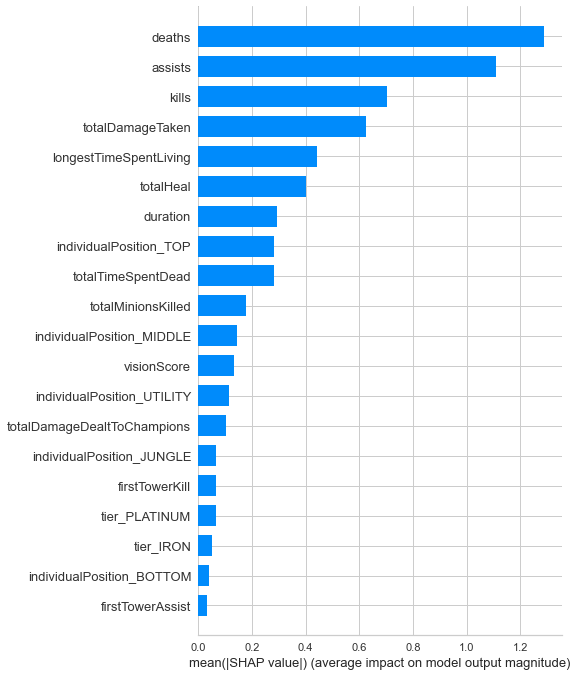

In [30]:
import shap
shap.initjs()
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2)

xgb = XGBClassifier(n_estiamtors = 500)
xgb.fit(X_train, y_train, early_stopping_rounds = 50, eval_set = [(X_test, y_test)], eval_metric = 'logloss')
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, col, plot_type = 'bar')

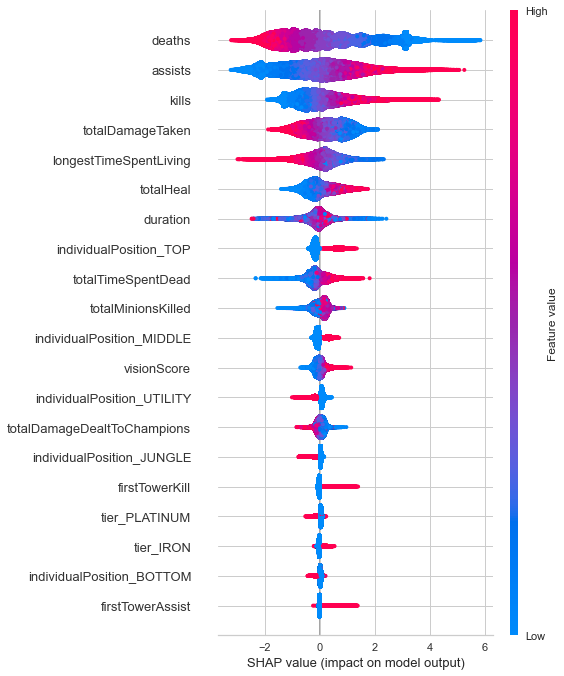

In [31]:
shap.summary_plot(shap_values, X_train)

## 모델링

### 기본 모델링

In [28]:
train_data = train_data.reset_index()

In [24]:
X_data.columns

Index(['teamId', 'assists', 'deaths', 'firstBloodAssist', 'firstBloodKill',
       'firstTowerAssist', 'firstTowerKill', 'kills', 'longestTimeSpentLiving',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'totalHeal',
       'totalMinionsKilled', 'totalTimeSpentDead', 'visionScore',
       'individualPosition_BOTTOM', 'individualPosition_Invalid',
       'individualPosition_JUNGLE', 'individualPosition_MIDDLE',
       'individualPosition_TOP', 'individualPosition_UTILITY', 'tier_BRONZE',
       'tier_GOLD', 'tier_IRON', 'tier_PLATINUM', 'tier_SILVER'],
      dtype='object')

In [29]:
X_train.shape

(919960, 27)

In [12]:
pip install pycaret

  Using cached tbats-1.1.3-py3-none-any.whl (44 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached psutil-5.9.5-cp36-abi3-win_amd64.whl (255 kB)
  Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl (65.9 MB)
  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
  Using cached xxhash-3.3.0-cp39-cp39-win_amd64.whl (29 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  Using cached schemdraw-0.15-py3-none-any.whl (106 kB)
  Using cached plotly_resampler-0.9.1-py3-none-any.whl (73 kB)
  Using cached scikit_learn-1.2.2-cp39-cp39-win_amd64.whl (8.4 MB)
  Using cached MarkupSafe-2.1.3-cp39-cp39-win_amd64.whl (17 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached pmdarima-2.0.3-cp39-cp39-win_amd64.whl (572 kB)
  Using cached importlib_metadata-

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\kygam\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Created wheel for pyod: filename=pyod-1.1.0-py3-none-any.whl size=185348 sha256=0f008e7c729c8e36a81b33faac5800b514ae897ba7c226d282a9bf98def28276
  Stored in directory: c:\users\kygam\appdata\local\pip\cache\wheels\d7\21\ce\d0f4083609d89f6c4371a5ecb8c13636e7570abaed1e2473ce
Successfully built pyod
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3


In [6]:
col = X_data.columns

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 42)

train_data = pd.DataFrame(X_train, columns = col)
train_data['win'] = y_train
train_data = train_data.reset_index()

exp = setup(data = train_data, target = 'win')
best_model = compare_models()
model = create_model(best_model)
final_model = finalize_model(model)

y_pred = predict_model(final_model, data = X_test)

accuracy = accuracy_score(y_test, y_pred['prediction_label'])
print(classification_report(y_test, y_pred['prediction_label']))
print(f"Accuracy : {accuracy}")
print(f"AUC : {roc_auc_score(y_test, y_pred['prediction_label'])}")


,Description,Value
0,Session id,1549
1,Target,win
2,Target type,Binary
3,Original data shape,"(919960, 28)"
4,Transformed data shape,"(919960, 28)"
5,Transformed train set shape,"(643972, 28)"
6,Transformed test set shape,"(275988, 28)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8188,0.9050,0.8018,0.8301,0.8157,0.6376,0.6380,36.5920
xgboost,Extreme Gradient Boosting,0.8160,0.9023,0.7971,0.8283,0.8124,0.6319,0.6324,33.8470
lightgbm,Light Gradient Boosting Machine,0.8107,0.8974,0.7925,0.8225,0.8072,0.6214,0.6219,2.6080
rf,Random Forest Classifier,0.8079,0.8918,0.7893,0.8199,0.8043,0.6158,0.6163,45.1310
ridge,Ridge Classifier,0.7980,0.0000,0.7907,0.8024,0.7965,0.5960,0.5960,0.5240
gbc,Gradient Boosting Classifier,0.7980,0.8843,0.7843,0.8064,0.7952,0.5959,0.5961,49.5070
lda,Linear Discriminant Analysis,0.7980,0.8714,0.7907,0.8024,0.7965,0.5960,0.5961,1.1620
ada,Ada Boost Classifier,0.7886,0.8736,0.7788,0.7943,0.7865,0.5771,0.5772,12.1130
qda,Quadratic Discriminant Analysis,0.7533,0.8179,0.8240,0.7220,0.7696,0.5065,0.5118,1.2350
dt,Decision Tree Classifier,0.7320,0.7320,0.7344,0.7310,0.7327,0.4641,0.4641,2.6200


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8183,0.9055,0.8022,0.8289,0.8154,0.6366,0.6370
1,0.8206,0.9066,0.8053,0.8308,0.8179,0.6413,0.6416
2,0.8203,0.9048,0.8003,0.8337,0.8166,0.6406,0.6411
3,0.8181,0.9038,0.8003,0.8298,0.8148,0.6361,0.6365
4,0.8179,0.9051,0.7995,0.8300,0.8145,0.6358,0.6362
5,0.8174,0.9039,0.8006,0.8285,0.8143,0.6348,0.6352
6,0.8216,0.9068,0.8049,0.8328,0.8186,0.6432,0.6436
7,0.8187,0.9053,0.8024,0.8294,0.8157,0.6374,0.6377
8,0.8184,0.9037,0.8029,0.8286,0.8156,0.6368,0.6371


ValueError: Invalid value for the index parameter. There are duplicate indices in the dataset. Use index=False to reset the index to RangeIndex.

In [7]:
X_team.columns

Index(['firstBaron', 'baron', 'firstDragon', 'dragon', 'firstInhibitor',
       'inhibitor', 'firstRiftHerald', 'riftHerald', 'firstTower', 'tower',
       'kills', 'deaths', 'totalDamageDealtToChampions', 'totalMinionsKilled',
       'team_100', 'team_200'],
      dtype='object')

In [13]:
X_team

NameError: name 'X_team' is not defined

In [19]:
X_team

,firstBaron,baron,firstDragon,dragon,firstInhibitor,inhibitor,firstRiftHerald,riftHerald,firstTower,tower,kills,deaths,totalDamageDealtToChampions,totalMinionsKilled,team_100,team_200
0,True,1,True,2,True,2,False,0,True,10,43,20,95441,578,1,0
1,False,0,False,0,False,0,True,1,False,1,5,31,38437,417,1,0
2,False,1,True,4,False,1,False,0,False,7,36,55,109322,594,1,0
3,True,1,False,4,True,2,False,0,True,10,50,22,133450,880,1,0
4,False,0,False,1,False,0,True,1,True,3,13,6,35515,403,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230229,False,0,True,2,False,0,False,0,False,0,15,35,54920,608,0,1
230230,False,0,False,3,True,1,False,0,False,8,40,15,103596,610,0,1
230231,True,1,True,4,True,2,False,1,True,9,35,31,126382,722,0,1
230232,False,0,False,0,False,0,True,1,False,0,11,18,35449,388,0,1


In [20]:
X_team.columns

Index(['firstBaron', 'baron', 'firstDragon', 'dragon', 'firstInhibitor',
       'inhibitor', 'firstRiftHerald', 'riftHerald', 'firstTower', 'tower',
       'kills', 'deaths', 'totalDamageDealtToChampions', 'totalMinionsKilled',
       'team_100', 'team_200'],
      dtype='object')

In [22]:
X_team = X_team[['deaths', 'tower', 'kills', 'inhibitor', 'totalMinionsKilled']]
X_team.columns

Index(['deaths', 'tower', 'kills', 'inhibitor', 'totalMinionsKilled'], dtype='object')

In [32]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.
  Using cached pycaret-3.1.0-py3-none-any.whl (483 kB)


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\kygam\\anaconda3\\Lib\\site-packages\\~klearn\\metrics\\cluster\\_expected_mutual_info_fast.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
  Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl (65.9 MB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  Using cached pyod-1.1.0-py3-none-any.whl
  Using cached category_encoders-2.6.2-py2.py3-none-any.whl (81 kB)
  Using cached schemdraw-0.15-py3-none-any.whl (106 kB)
  Using cached sktime-0.21.1-py3-none-any.whl (17.1 MB)
  Using cached numba-0.58.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached plotly_resampler-0.9.1-py3-none-any.whl (73 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached psutil-5.9.5-cp36-abi3-win_amd64.whl (255 kB)
  Using cached importlib_metadata-6.8.0-py3-none-any.whl (22 kB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached scikit_learn-1.2.2-cp39-cp39-win_amd64.whl (8.4 MB)
  Using cached pmdarima-2.0.3-cp39-cp39-win_amd64.whl (572 kB)
  Using cached tbats-1.1.3-py3-none-

  Using cached Deprecated-1.2.14-py2.py3-none-any.whl (9.6 kB)
  Using cached scikit_base-0.5.1-py3-none-any.whl (118 kB)
  Using cached packaging-23.1-py3-none-any.whl (48 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
  

In [34]:
from pycaret.classification import *

ModuleNotFoundError: No module named 'pycaret'

In [26]:

col = X_team.columns

X_train, X_test, y_train, y_test = train_test_split(X_team, y_team, test_size = 0.2, random_state = 42)

train_data = pd.DataFrame(X_train, columns = col)
train_data['win'] = y_train

exp = setup(data = train_data, target = 'win')
#best_model = compare_models()
#model = create_model(best_model)
model = create_model('lightgbm')
final_model = finalize_model(model)

# y_pred = predict_model(final_model, data = X_test)

# accuracy = accuracy_score(y_test, y_pred['prediction_label'])
# print(classification_report(y_test, y_pred['prediction_label']))
# print(f"Accuracy : {accuracy}")
# print(f"AUC : {roc_auc_score(y_test, y_pred['prediction_label'])}")


NameError: name 'setup' is not defined

### 정규화

In [18]:
X_team.columns

Index(['firstBaron', 'baron', 'firstDragon', 'dragon', 'firstInhibitor',
       'inhibitor', 'firstRiftHerald', 'riftHerald', 'firstTower', 'tower',
       'kills', 'deaths', 'totalDamageDealtToChampions', 'totalMinionsKilled',
       'team_100', 'team_200'],
      dtype='object')

In [17]:
y_team.shape

(230234,)

In [45]:
X_scaled.shape

(919960, 26)

In [46]:
y_train.shape

(919960,)

In [50]:
X_train.columns

Index(['teamId', 'assists', 'deaths', 'firstBloodAssist', 'firstBloodKill',
       'firstTowerAssist', 'firstTowerKill', 'kills', 'longestTimeSpentLiving',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'totalHeal',
       'totalMinionsKilled', 'totalTimeSpentDead', 'visionScore',
       'individualPosition_BOTTOM', 'individualPosition_Invalid',
       'individualPosition_JUNGLE', 'individualPosition_MIDDLE',
       'individualPosition_TOP', 'individualPosition_UTILITY', 'tier_BRONZE',
       'tier_GOLD', 'tier_IRON', 'tier_PLATINUM', 'tier_SILVER'],
      dtype='object')

In [53]:
X_data

,teamId,assists,deaths,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,kills,longestTimeSpentLiving,totalDamageDealtToChampions,totalDamageTaken,totalHeal,totalMinionsKilled,totalTimeSpentDead,visionScore,individualPosition_BOTTOM,individualPosition_Invalid,individualPosition_JUNGLE,individualPosition_MIDDLE,individualPosition_TOP,individualPosition_UTILITY,tier_BRONZE,tier_GOLD,tier_IRON,tier_PLATINUM,tier_SILVER
0,100,2,6,False,False,False,False,5,582,10443,26826,779,191,174,12,0,0,0,0,1,0,0,0,1,0,0
1,100,2,8,False,False,False,False,1,347,10835,18228,1220,136,200,10,0,0,0,0,1,0,0,0,1,0,0
2,100,4,12,False,False,False,False,2,364,8819,33508,4057,95,305,19,0,0,0,0,1,0,0,0,1,0,0
3,100,13,7,False,False,False,True,15,712,53227,32657,8450,274,283,25,0,0,0,0,1,0,0,0,1,0,0
4,100,1,1,False,False,False,True,2,416,8879,11318,5487,106,16,15,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114990,200,7,2,False,False,False,False,1,685,3686,10165,670,18,58,33,0,0,0,0,0,1,0,0,0,1,0
114991,200,24,4,False,False,False,False,0,392,3991,13921,1906,15,63,74,0,0,0,0,0,1,0,0,0,1,0
114992,200,16,7,False,False,False,True,6,531,36424,17777,1618,84,153,69,0,0,0,0,0,1,0,0,0,1,0
114993,200,2,4,False,False,False,False,1,279,3746,7540,225,24,45,19,0,0,0,0,0,1,0,0,0,1,0


In [21]:
train_data.columns

Index(['teamId', 'assists', 'deaths', 'firstBloodAssist', 'firstBloodKill',
       'firstTowerAssist', 'firstTowerKill', 'kills', 'longestTimeSpentLiving',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'totalHeal',
       'totalMinionsKilled', 'totalTimeSpentDead', 'visionScore',
       'individualPosition_BOTTOM', 'individualPosition_Invalid',
       'individualPosition_JUNGLE', 'individualPosition_MIDDLE',
       'individualPosition_TOP', 'individualPosition_UTILITY', 'tier_BRONZE',
       'tier_GOLD', 'tier_IRON', 'tier_PLATINUM', 'tier_SILVER', 'win'],
      dtype='object')

In [25]:
individual_data.index

RangeIndex(start=0, stop=919960, step=1)

In [35]:
col

Index(['teamId', 'assists', 'deaths', 'firstBloodAssist', 'firstBloodKill',
       'firstTowerAssist', 'firstTowerKill', 'kills', 'longestTimeSpentLiving',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'totalHeal',
       'totalMinionsKilled', 'totalTimeSpentDead', 'visionScore',
       'individualPosition_BOTTOM', 'individualPosition_Invalid',
       'individualPosition_JUNGLE', 'individualPosition_MIDDLE',
       'individualPosition_TOP', 'individualPosition_UTILITY', 'tier_BRONZE',
       'tier_GOLD', 'tier_IRON', 'tier_PLATINUM', 'tier_SILVER'],
      dtype='object')

In [46]:
individual_data

,teamId,assists,deaths,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,kills,longestTimeSpentLiving,totalDamageDealtToChampions,...,individualPosition_Invalid,individualPosition_JUNGLE,individualPosition_MIDDLE,individualPosition_TOP,individualPosition_UTILITY,tier_BRONZE,tier_GOLD,tier_IRON,tier_PLATINUM,tier_SILVER
0,1.001264,-0.219665,0.995795,-0.354351,-0.328499,-0.211074,-0.286248,0.722578,-0.159476,1.428436,...,-0.023736,-0.506556,2.002068,-0.499195,-0.495638,-0.499825,-0.500036,-0.499856,-0.499935,1.998608
1,-0.998738,-0.942030,-0.480283,-0.354351,-0.328499,-0.211074,-0.286248,-0.553827,0.379290,-0.694293,...,-0.023736,-0.506556,-0.499484,2.003226,-0.495638,2.000700,-0.500036,-0.499856,-0.499935,-0.500348
2,1.001264,-0.580848,-1.070715,-0.354351,-0.328499,-0.211074,-0.286248,0.509844,-0.202710,-0.282129,...,-0.023736,-0.506556,-0.499484,-0.499195,-0.495638,-0.499825,-0.500036,-0.499856,2.000258,-0.500348
3,1.001264,-0.400256,0.110148,2.822060,-0.328499,-0.211074,-0.286248,-1.192030,-0.359019,-0.777066,...,-0.023736,-0.506556,2.002068,-0.499195,-0.495638,-0.499825,-0.500036,-0.499856,-0.499935,1.998608
4,-0.998738,-0.761439,0.995795,-0.354351,-0.328499,-0.211074,-0.286248,0.297109,-0.462116,-0.199185,...,-0.023736,-0.506556,-0.499484,-0.499195,-0.495638,-0.499825,-0.500036,-0.499856,2.000258,-0.500348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919955,-0.998738,1.405655,1.291011,-0.354351,-0.328499,-0.211074,-0.286248,-0.341093,-0.289179,-0.107641,...,-0.023736,-0.506556,-0.499484,-0.499195,2.017602,-0.499825,-0.500036,2.000578,-0.499935,-0.500348
919956,-0.998738,-0.400256,-0.185068,2.822060,-0.328499,-0.211074,-0.286248,-0.128359,-0.026447,-0.387725,...,-0.023736,1.974115,-0.499484,-0.499195,-0.495638,2.000700,-0.500036,-0.499856,-0.499935,-0.500348
919957,1.001264,-0.580848,-0.185068,-0.354351,3.044148,-0.211074,-0.286248,1.786249,0.096604,1.232914,...,-0.023736,-0.506556,-0.499484,2.003226,-0.495638,-0.499825,-0.500036,2.000578,-0.499935,-0.500348
919958,1.001264,-0.219665,1.291011,-0.354351,-0.328499,-0.211074,-0.286248,-0.553827,-0.315785,-0.462919,...,-0.023736,-0.506556,-0.499484,-0.499195,2.017602,-0.499825,-0.500036,-0.499856,-0.499935,1.998608


In [7]:
y_train.drop(columns = 'index', inplace = True)

In [53]:
type(y_train)

pandas.core.frame.DataFrame

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

col = X_data.columns

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 42)

X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

individual_data = pd.DataFrame(X_scaled, columns = col)
y_train = y_train.reset_index()
individual_data['win'] = y_train.win
individual_data = individual_data.reset_index()

exp = setup(data = individual_data, target = 'win')
best_model = compare_models()
model = create_model(best_model)
final_model = finalize_model(model)

y_pred = predict_model(final_model, data = X_test_scaled)

accuracy = accuracy_score(y_test, y_pred['prediction_label'])
print(classification_report(y_test, y_pred['prediction_label']))
print(f"Accuracy : {accuracy}")
print(f"AUC : {roc_auc_score(y_test, y_pred['prediction_label'])}")

,Description,Value
0,Session id,8622
1,Target,win
2,Target type,Binary
3,Original data shape,"(919960, 28)"
4,Transformed data shape,"(919960, 28)"
5,Transformed train set shape,"(643972, 28)"
6,Transformed test set shape,"(275988, 28)"
7,Numeric features,27
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8189,0.9054,0.8028,0.8295,0.8159,0.6378,0.6381,34.5620
xgboost,Extreme Gradient Boosting,0.8160,0.9026,0.7979,0.8280,0.8126,0.6321,0.6325,33.8220
lightgbm,Light Gradient Boosting Machine,0.8112,0.8979,0.7949,0.8218,0.8081,0.6225,0.6228,2.2950
rf,Random Forest Classifier,0.8076,0.8921,0.7900,0.8188,0.8041,0.6151,0.6155,42.8640
ridge,Ridge Classifier,0.7985,0.0000,0.7915,0.8028,0.7971,0.5971,0.5971,0.5490
lda,Linear Discriminant Analysis,0.7985,0.8719,0.7915,0.8028,0.7971,0.5971,0.5971,1.2490
gbc,Gradient Boosting Classifier,0.7983,0.8846,0.7859,0.8060,0.7958,0.5966,0.5968,48.4850
ada,Ada Boost Classifier,0.7889,0.8736,0.7784,0.7951,0.7866,0.5777,0.5779,12.0510
qda,Quadratic Discriminant Analysis,0.7509,0.8182,0.8592,0.7062,0.7752,0.5017,0.5140,1.1660
dt,Decision Tree Classifier,0.7309,0.7309,0.7325,0.7302,0.7313,0.4617,0.4617,2.5310


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8169,0.9045,0.8001,0.8279,0.8138,0.6338,0.6342
1,0.8202,0.9061,0.8065,0.8292,0.8177,0.6403,0.6406
2,0.8162,0.9031,0.8000,0.8269,0.8132,0.6325,0.6328
3,0.8189,0.9051,0.8035,0.8291,0.8161,0.6378,0.6381
4,0.8209,0.9066,0.8036,0.8324,0.8178,0.6418,0.6422
5,0.8187,0.9061,0.8012,0.8304,0.8155,0.6375,0.6379
6,0.8197,0.9062,0.8053,0.8292,0.8171,0.6394,0.6396
7,0.8199,0.9058,0.8034,0.8308,0.8169,0.6398,0.6401
8,0.8178,0.9046,0.8021,0.8281,0.8149,0.6356,0.6359


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
individual_data['win'] = y_train
individual_data = individual_data.reset_index()
# train_data = train_data.reset_index()
exp = setup(data = individual_data, target = 'win')
best_model = compare_models()
model = create_model(best_model)
final_model = finalize_model(model)

y_pred = predict_model(final_model, data = X_test_scaled)

accuracy = accuracy_score(y_test, y_pred['prediction_label'])
print(classification_report(y_test, y_pred['prediction_label']))
print(f"Accuracy : {accuracy}")
print(f"AUC : {roc_auc_score(y_test, y_pred['prediction_label'])}")

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

col = ['team_100','team_200', 'firstBaron', 'baron', 'firstDragon', 'dragon',
       'firstInhibitor', 'inhibitor', 'firstRiftHerald', 'riftHerald',
       'firstTower', 'tower', 'kills', 'deaths',
       'totalDamageDealtToChampions', 'totalMinionsKilled']

X_train, X_test, y_train, y_test = train_test_split(X_team, y_team, test_size = 0.2, random_state = 42)

X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

train_data = pd.DataFrame(X_scaled, columns = col)
train_data['win'] = y_train

train_data = train_data.dropna(axis = 0)

In [11]:
exp = setup(data = train_data, target = 'win')
best_model = compare_models()
model = create_model(best_model)
final_model = finalize_model(model)

y_pred = predict_model(final_model, data = X_test_scaled)

accuracy = accuracy_score(y_test, y_pred['prediction_label'])
print(classification_report(y_test, y_pred['prediction_label']))
print(f"Accuracy : {accuracy}")
print(f"AUC : {roc_auc_score(y_test, y_pred['prediction_label'])}")


,Description,Value
0,Session id,6877
1,Target,win
2,Target type,Binary
3,Original data shape,"(147566, 17)"
4,Transformed data shape,"(147566, 17)"
5,Transformed train set shape,"(103296, 17)"
6,Transformed test set shape,"(44270, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5021,0.5025,0.5021,0.5021,0.5018,0.0042,0.0042,0.2300
ada,Ada Boost Classifier,0.5011,0.5007,0.5011,0.5011,0.5010,0.0021,0.0021,0.8690
svm,SVM - Linear Kernel,0.5006,0.0000,0.5006,0.4126,0.4034,0.0012,-0.0010,0.0970
rf,Random Forest Classifier,0.5006,0.4996,0.5006,0.5006,0.5004,0.0013,0.0013,3.8270
gbc,Gradient Boosting Classifier,0.5006,0.5015,0.5006,0.5006,0.5000,0.0011,0.0011,3.6120
nb,Naive Bayes,0.5004,0.4995,0.5004,0.5004,0.4972,0.0008,0.0008,0.0500
et,Extra Trees Classifier,0.5002,0.5011,0.5002,0.5002,0.5001,0.0004,0.0004,2.5880
dummy,Dummy Classifier,0.5001,0.5000,0.5001,0.2501,0.3335,0.0000,0.0000,0.0390
dt,Decision Tree Classifier,0.4996,0.4996,0.4996,0.4996,0.4996,-0.0008,-0.0008,0.2930
knn,K Neighbors Classifier,0.4993,0.4992,0.4993,0.4993,0.4992,-0.0015,-0.0015,1.6260


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5076,0.5095,0.5076,0.5077,0.5072,0.0153,0.0153
1,0.5052,0.5053,0.5052,0.5053,0.5041,0.0105,0.0105
2,0.5030,0.4991,0.5030,0.5030,0.5028,0.0060,0.0060
3,0.5062,0.5058,0.5062,0.5063,0.5052,0.0124,0.0125
4,0.4984,0.5016,0.4984,0.4984,0.4983,-0.0033,-0.0033
5,0.5013,0.5020,0.5013,0.5013,0.5013,0.0025,0.0025
6,0.4985,0.5009,0.4985,0.4985,0.4985,-0.0030,-0.0030
7,0.5079,0.5054,0.5079,0.5079,0.5078,0.0158,0.0158
8,0.5048,0.5036,0.5048,0.5048,0.5047,0.0096,0.0096


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

### 앙상블

In [59]:
X_train

,firstBaron,baron,firstDragon,dragon,firstInhibitor,inhibitor,firstRiftHerald,riftHerald,firstTower,tower,kills,deaths,totalDamageDealtToChampions,totalMinionsKilled,team_100,team_200
71746,False,0,False,0,False,0,False,0,False,0,12,31,56449,494,0,1
179690,False,0,False,1,False,0,False,0,False,3,25,23,82812,653,0,1
94647,True,1,False,2,True,2,True,2,True,9,40,22,117566,566,1,0
95115,False,0,True,1,False,0,True,1,True,1,20,4,34724,308,1,0
81398,False,0,False,0,False,0,False,0,False,0,8,32,22439,269,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,False,0,True,1,False,0,False,1,True,4,18,24,48363,400,0,1
103694,False,0,False,0,False,0,False,0,False,0,2,16,25949,296,1,0
131932,False,0,True,2,False,0,True,1,True,5,22,8,56015,441,0,1
146867,False,0,False,0,False,0,False,0,False,0,15,40,77455,517,1,0


In [61]:
y_train


,index,win
0,71746,False
1,179690,False
2,94647,True
3,95115,True
4,81398,False
...,...,...
184182,119879,False
184183,103694,False
184184,131932,True
184185,146867,False


In [9]:
col = ['team', 'firstBaron', 'baron', 'firstDragon', 'dragon',
       'firstInhibitor', 'inhibitor', 'firstRiftHerald', 'riftHerald',
       'firstTower', 'tower', 'kills', 'deaths',
       'totalDamageDealtToChampions', 'totalMinionsKilled']

X_train, X_test, y_train, y_test = train_test_split(X_team, y_team, test_size = 0.2, random_state = 42)

train_data = pd.DataFrame(X_train, columns = col)
y_train = y_train.reset_index()
train_data['win'] = y_train.win
train_data = train_data.reset_index()
exp = setup(data = train_data, target = 'win')
models = compare_models(n_select = 2)


NameError: name 'X_team' is not defined

In [54]:
blender = blend_models(estimator_list = models)

final_model = finalize_model(blender)

y_pred = predict_model(final_model, data = X_test)

accuracy = accuracy_score(y_test, y_pred['prediction_label'])
print(classification_report(y_test, y_pred['prediction_label']))
print(f"Accuracy : {accuracy}")
print(f"AUC : {roc_auc_score(y_test, y_pred['prediction_label'])}")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9584,0.9939,0.9636,0.9538,0.9587,0.9169,0.9169
1,0.9566,0.9934,0.9622,0.9516,0.9568,0.9131,0.9132
2,0.9584,0.9937,0.9661,0.9516,0.9588,0.9169,0.9170
3,0.9600,0.9937,0.9687,0.9522,0.9604,0.9200,0.9201
4,0.9580,0.9938,0.9670,0.9501,0.9584,0.9161,0.9162
5,0.9582,0.9938,0.9692,0.9484,0.9587,0.9164,0.9166
6,0.9566,0.9934,0.9625,0.9513,0.9569,0.9131,0.9132
7,0.9547,0.9932,0.9588,0.9511,0.9549,0.9094,0.9094
8,0.9598,0.9946,0.9654,0.9548,0.9601,0.9196,0.9197


              precision    recall  f1-score   support

       False       0.97      0.95      0.96     23104
        True       0.95      0.97      0.96     22943

    accuracy                           0.96     46047
   macro avg       0.96      0.96      0.96     46047
weighted avg       0.96      0.96      0.96     46047

Accuracy : 0.9585206419527874
AUC : 0.9585494448605197


In [63]:
y_train

,index,win
0,637006,1
1,243845,0
2,72598,1
3,598262,0
4,991532,0
...,...,...
919955,110268,1
919956,259178,0
919957,131932,1
919958,671155,0


In [68]:
y_train.win.isna().sum()

0

In [70]:
y_train

,index,win
0,637006,1
1,243845,0
2,72598,1
3,598262,0
4,991532,0
...,...,...
919955,110268,1
919956,259178,0
919957,131932,1
919958,671155,0


In [69]:
train_data

,index,teamId,assists,deaths,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,kills,longestTimeSpentLiving,...,individualPosition_JUNGLE,individualPosition_MIDDLE,individualPosition_TOP,individualPosition_UTILITY,tier_BRONZE,tier_GOLD,tier_IRON,tier_PLATINUM,tier_SILVER,win
0,637006,200,6,9,False,False,False,False,9,518,...,0,1,0,0,0,0,0,0,1,0.0
1,243845,100,2,4,False,False,False,False,3,680,...,0,0,1,0,1,0,0,0,0,1.0
2,72598,200,4,2,False,False,False,False,8,505,...,0,0,0,0,0,0,0,1,0,0.0
3,598262,200,5,6,True,False,False,False,0,458,...,0,1,0,0,0,0,0,0,1,0.0
4,991532,100,3,9,False,False,False,False,7,427,...,0,0,0,0,0,0,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919955,110268,100,15,10,False,False,False,False,4,479,...,0,0,0,1,0,0,1,0,0,1.0
919956,259178,100,5,5,True,False,False,False,5,558,...,1,0,0,0,1,0,0,0,0,1.0
919957,131932,200,4,5,False,True,False,False,14,595,...,0,0,1,0,0,0,1,0,0,0.0
919958,671155,200,6,10,False,False,False,False,3,471,...,0,0,0,1,0,0,0,0,1,1.0


In [73]:
y_train

637006    1
243845    0
72598     1
598262    0
991532    0
         ..
110268    1
259178    0
131932    1
671155    0
121958    0
Name: win, Length: 919960, dtype: int64

In [10]:
col = X_data.columns

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 42)

train_data = pd.DataFrame(X_train, columns = col)
#y_train = y_train.reset_index()
train_data['win'] = y_train
train_data = train_data.reset_index()
exp = setup(data = train_data, target = 'win')
models = compare_models(n_select = 2)


,Description,Value
0,Session id,5803
1,Target,win
2,Target type,Binary
3,Original data shape,"(919960, 28)"
4,Transformed data shape,"(919960, 28)"
5,Transformed train set shape,"(643972, 28)"
6,Transformed test set shape,"(275988, 28)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8186,0.9051,0.8029,0.8290,0.8158,0.6373,0.6376,34.7680
xgboost,Extreme Gradient Boosting,0.8159,0.9024,0.7984,0.8273,0.8126,0.6317,0.6321,34.0900
lightgbm,Light Gradient Boosting Machine,0.8105,0.8975,0.7928,0.8219,0.8071,0.6210,0.6214,2.1750
rf,Random Forest Classifier,0.8073,0.8917,0.7885,0.8193,0.8036,0.6146,0.6150,38.8490
et,Extra Trees Classifier,0.7990,0.8835,0.7842,0.8082,0.7960,0.5980,0.5983,85.8440
gbc,Gradient Boosting Classifier,0.7979,0.8843,0.7845,0.8062,0.7952,0.5958,0.5961,48.4410
ridge,Ridge Classifier,0.7976,0.0000,0.7907,0.8019,0.7962,0.5953,0.5954,0.3810
lda,Linear Discriminant Analysis,0.7976,0.8713,0.7907,0.8019,0.7962,0.5953,0.5953,1.1390
ada,Ada Boost Classifier,0.7882,0.8734,0.7784,0.7939,0.7861,0.5763,0.5764,11.8640
qda,Quadratic Discriminant Analysis,0.7537,0.8174,0.8112,0.7276,0.7670,0.5073,0.5109,1.2640


In [11]:
blender = blend_models(estimator_list = models)

final_model = finalize_model(blender)

y_pred = predict_model(final_model, data = X_test)

accuracy = accuracy_score(y_test, y_pred['prediction_label'])
print(classification_report(y_test, y_pred['prediction_label']))
print(f"Accuracy : {accuracy}")
print(f"AUC : {roc_auc_score(y_test, y_pred['prediction_label'])}")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8174,0.9047,0.8021,0.8274,0.8146,0.6348,0.6351
1,0.8205,0.9062,0.8045,0.8312,0.8176,0.6410,0.6413
2,0.8167,0.9036,0.7985,0.8287,0.8133,0.6334,0.6339
3,0.8192,0.9057,0.8027,0.8301,0.8162,0.6384,0.6387
4,0.8164,0.9036,0.7988,0.8279,0.8131,0.6327,0.6331
5,0.8158,0.9035,0.8001,0.8260,0.8128,0.6315,0.6318
6,0.8172,0.9049,0.7982,0.8298,0.8137,0.6344,0.6349
7,0.8183,0.9046,0.8017,0.8293,0.8153,0.6367,0.6370
8,0.8200,0.9053,0.8044,0.8302,0.8171,0.6399,0.6402


ValueError: Invalid value for the index parameter. There are duplicate indices in the dataset. Use index=False to reset the index to RangeIndex.

## 변수선택

### Individual Data

In [ ]:
# 전진 선택법
variables = df.columns[:-2].tolist() ## 설명 변수 리스트
 
y = df['Survival_Time'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

### Team Data

In [19]:
team.head()

,matchID,team,firstBaron,baron,firstDragon,dragon,firstInhibitor,inhibitor,firstRiftHerald,riftHerald,firstTower,tower,win,kills,deaths,totalDamageDealtToChampions,totalMinionsKilled
0,KR_6321310517,100,True,1,True,2,True,2,False,0,True,10,True,43,20,95441,578
1,KR_6321324394,100,False,0,False,0,False,0,True,1,False,1,False,5,31,38437,417
2,KR_6321333413,100,False,1,True,4,False,1,False,0,False,7,False,36,55,109322,594
3,KR_6321357609,100,True,1,False,4,True,2,False,0,True,10,True,50,22,133450,880
4,KR_6321393539,100,False,0,False,1,False,0,True,1,True,3,True,13,6,35515,403


In [22]:
# 전진 선택법
variables = X_team.columns.tolist() ## 설명 변수 리스트
 
y = y_team ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = team[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(team[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

NameError: name 'sm' is not defined